<a href="https://colab.research.google.com/github/pallavkumar1981/MSDS462-self-driving-car/blob/main/01_Data_Preparation_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing libraries

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Normalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow.keras.backend as K

import os
import random
from scipy import pi
from datetime import datetime
import cv2
import pickle
import json
from itertools import islice

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
cv2.__version__

'4.5.4'

In [ ]:
SPLIT = 0.9

# 1. [OPTIONAL] Read the data/images and save them as as pickle file 

In [ ]:
DATA_FOLDER = './driving_dataset/'
METADATA_FILE = os.path.join(DATA_FOLDER, 'data.txt')

In [ ]:
%%time
#reading the data set from data.txt
X = []
labels = []

#islice(text, start, stop, LIMIT) --> ('ABCDEF', 2, None) --> 'C D E F'  -->https://docs.python.org/2/library/itertools.html
with open(METADATA_FILE) as f:
    for line in islice(f, None):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        labels.append(float(angle)*pi/180)

labels = np.array(labels)
print('Finished processing')

Finished processing
Wall time: 179 ms


In [ ]:
len(labels)

45406

*   Original_size of the image: (256, 455, 3)
*   After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
*   Shape after resizing it: (66, 200, 3)

Doing it for all images...

In [ ]:
%%time
features = []
for i in X:
    img = cv2.imread(i)
    img = img[-150:]
    resized_img = cv2.resize(img, (200,66))
    features.append(resized_img)

Wall time: 2min 30s


In [ ]:
%%time
features = np.array(features)

Wall time: 3.4 s


In [ ]:
with open('./pickle/features.pkl', 'wb') as f:
    pickle.dump(features, f)
with open('./pickle/labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

# 2. Loading the processed data (from pickle file)

In [ ]:
def loadFromPickle():
    with open("./pickle/features.pkl", "rb") as f:
        features = np.array(pickle.load(f))
    with open("./pickle/labels.pkl", "rb") as f:
        labels = np.array(pickle.load(f))
    return features, labels

In [ ]:
%%time
features, labels = loadFromPickle()

Wall time: 2.03 s


In [ ]:
%%time
features, labels = shuffle(features, labels)

Wall time: 722 ms


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, random_state=0,test_size=(1-SPLIT))

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40865, 66, 200, 3)
(4541, 66, 200, 3)
(40865,)
(4541,)


# 3. EDA

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


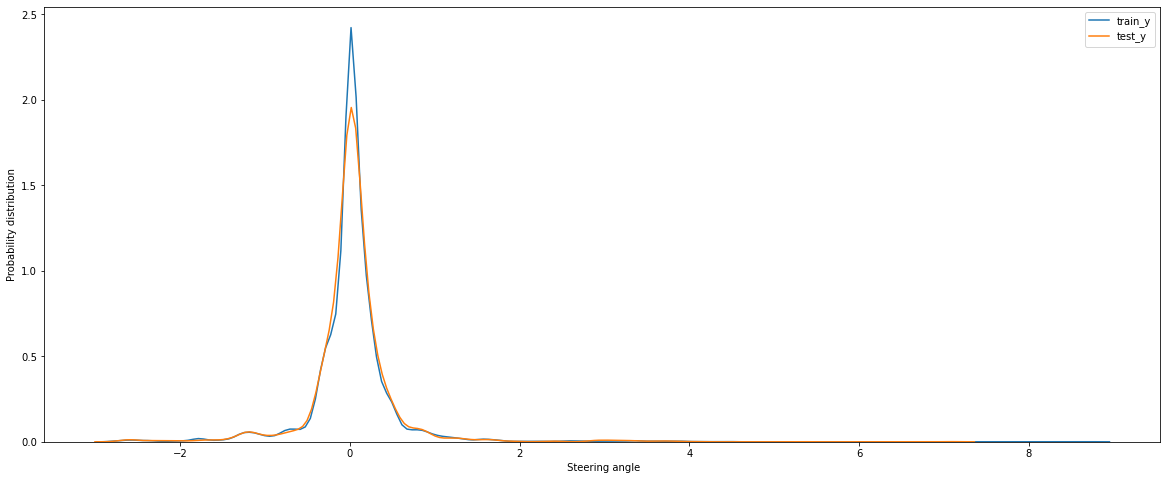

In [ ]:
#distribution of train and test y
plt.figure(figsize=(20,8))
sns.distplot(y_train, hist=False, label='train_y')
sns.distplot(y_val, hist=False, label='test_y')
plt.xlabel(' Steering angle')
plt.ylabel('Probability distribution')
plt.legend()
plt.show()

In [ ]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(y_train)

print('Test_MSE(MEAN):%f' % np.mean(np.square(y_val-train_mean_y)) )
print('Test_MSE(ZERO):%f' % np.mean(np.square(y_val-0.0)) )

Test_MSE(MEAN):0.275442
Test_MSE(ZERO):0.276331


**Note:**

These are MSE for our base models



# 4. Preparing data for model

In [ ]:
X_train = X_train/255.0
X_val = X_val/255.0

In [ ]:
with open('./pickle/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('./pickle/X_val.pkl', 'wb') as f:
    pickle.dump(X_val, f)
with open('./pickle/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('./pickle/y_val.pkl', 'wb') as f:
    pickle.dump(y_val, f)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(img_size)

(40865, 66, 200, 3)
(4541, 66, 200, 3)
(66, 200, 3)


**So, here we have read the images, processed the data and stored the training and validation variables as pickle files. Also, we have evaluated MSE for our base model**